In [1]:
from keras import Input, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2

from spektral.datasets import mnist
from spektral.layers import GraphConv
from spektral.layers.ops import sp_matrix_to_sp_tensor
from spektral.utils import normalized_laplacian

Using TensorFlow backend.


In [2]:
# Parameters
l2_reg = 5e-4         # Regularization rate for l2
learning_rate = 1e-3  # Learning rate for SGD
batch_size = 32       # Batch size
epochs = 1000         # Number of training epochs
es_patience = 10     # Patience fot early stopping

# Load data
X_train, y_train, X_val, y_val, X_test, y_test, adj = mnist.load_data()
X_train, X_val, X_test = X_train[..., None], X_val[..., None], X_test[..., None]
N = X_train.shape[-2]      # Number of nodes in the graphs
F = X_train.shape[-1]      # Node features dimensionality
n_out = 10  # Dimension of the target

fltr = normalized_laplacian(adj)

# Model definition
X_in = Input(shape=(N, F))
# Pass A as a fixed tensor, otherwise Keras will complain about inputs of
# different rank.
A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))

graph_conv = GraphConv(32,
                       activation='elu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=True)([X_in, A_in])
graph_conv = GraphConv(32,
                       activation='elu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=True)([graph_conv, A_in])
flatten = Flatten()(graph_conv)
fc = Dense(512, activation='relu')(flatten)
output = Dense(n_out, activation='softmax')(fc)

# Build model
model = Model(inputs=[X_in, A_in], outputs=output)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

# Train model
validation_data = (X_val, y_val)
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=validation_data,
          epochs=epochs, 
          callbacks=[
              EarlyStopping(patience=es_patience, restore_best_weights=True)
          ])

# Evaluate model
print('Evaluating model.')
eval_results = model.evaluate(X_test,
                              y_test,
                              batch_size=batch_size)
print('Done.\n'
      'Test loss: {}\n'
      'Test acc: {}'.format(*eval_results))

11493376/11490434 [==============================] - 3s 0us/step






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784, 1)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (784, 784)           0                                            
__________________________________________________________________________________________________
graph_conv_1 (GraphConv)        (None, 784, 32)      64          input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
graph_conv_2 (GraphCo

In [5]:
from spektral.utils.data import Batch                                                               
import numpy as np

In [9]:
A_list = np.ones((2, 2))

In [10]:
print(A_list)

[[1. 1.]
 [1. 1.]]


In [5]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool

# k nearest neighbors
knn = 200

# weighting paras
alpha = 0.05  # penalty on the optimization distance between p_star
beta = 0.5   # penalty on the points that far away from p_tilda
lamda = 0.5  # penalty on the points that does not belong to this plane
miu = 0.0001  # for even distribution

# boundary for paras
bnd1 = (-math.inf,math.inf)
bnd2 = (-math.inf,math.inf)
bnd3 = (-math.inf,math.inf)
bnd4 = (0,math.pi*2)
bnd5 = (0,math.pi*2)
bnd = (bnd1,bnd2,bnd3,bnd4,bnd5)

def knnindices(X,K):
    nbrs = NearestNeighbors(n_neighbors=K, algorithm='kd_tree').fit(X)
    # indices.shape = (M,K)
    distances, indices = nbrs.kneighbors(X)

    return distances, indices

In [7]:
rawData = pd.read_csv('array.csv').values
windowData = rawData[:,2:5]

In [10]:
distance, indices = knnindices(windowData, knn)
mean_distance = np.mean(distance,axis=1).reshape(windowData.shape[0],)

In [16]:
print(indices)

[[     0     59    868 ...   5129   7397   8517]
 [     1    888     66 ...   9670   9664    879]
 [     2    381     74 ...   9680    369   4066]
 ...
 [717169 717038 716854 ... 716348 716614 714293]
 [717170 717138 716859 ... 715593 715062 715338]
 [717171 717143 716877 ... 715856 715333 431501]]


In [17]:
mean_distance = np.mean(distance,axis=1).reshape(windowData.shape[0],)

In [18]:
threshold = np.percentile(mean_distance,98)

In [21]:
print("threshold is: ",threshold)    
qualified_data = windowData[mean_distance<threshold]
print(qualified_data.shape)

threshold is:  0.011067952260191303
(702828, 3)


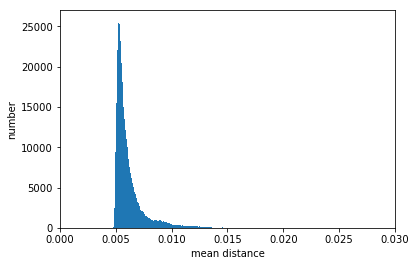

In [22]:
plt.hist(mean_distance, bins=1000)
plt.xlabel('mean distance')
plt.ylabel('number')
plt.xlim(0, 0.03)
plt.show()

In [4]:
# modules for aggregating embeddings of neighbors

import torch
import torch.nn as nn
from torch.autograd import Variable

import random

In [ ]:
# DIFFPOOL aggregate a node's embeddings using mean of neighbors embeddings

def forward(nodes, to_neighs, num_sample=10):
    






